<a href="https://colab.research.google.com/github/AmeerAliSaleem/dig_data_shell_project/blob/main/DigData_Shell_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shell DigData Project Submission

---


## By Aadam Ul Haq and Ameer Ali Saleem

A notebook detailing the coding portion of the Shell DigData Step Up Challenge.

# Exploratory Data Analysis

We begin by exploring the datasets in an attempt to spot patterns and deal with erroneous data values.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# importing datasets
daily = pd.read_csv('daily.csv')
hourly = pd.read_csv('hourly.csv')
weekly = pd.read_csv('weekly.csv')
monthly = pd.read_csv('monthly.csv')

In [ ]:
hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DateHour                             8760 non-null   object 
 1   Wind_Speed_Actual_Knots              8751 non-null   float64
 2   Production_Actual_MWh                8760 non-null   float64
 3   Production_Forecast_1hour_MWh        8760 non-null   float64
 4   Production_Forecast_6hour_MWh        8760 non-null   float64
 5   Production_24hour_MWh                8760 non-null   float64
 6   Electricity_Prices_Day_Ahead_Dollar  8760 non-null   float64
 7   Electricity_Prices_Spot_Dollar       8760 non-null   float64
dtypes: float64(7), object(1)
memory usage: 547.6+ KB


In [ ]:
hourly.describe()

,Wind_Speed_Actual_Knots,Production_Actual_MWh,Production_Forecast_1hour_MWh,Production_Forecast_6hour_MWh,Production_24hour_MWh,Electricity_Prices_Day_Ahead_Dollar,Electricity_Prices_Spot_Dollar
count,8751.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,15.150708,219.800691,207.072518,201.079037,191.862525,95.375027,93.285188
std,9.704591,320.797377,310.996068,305.458660,297.399502,25.168086,24.454762
min,-0.360000,-0.001400,0.002200,0.020000,0.010900,-11.400000,-10.890000
25%,7.990000,16.328050,14.755025,14.533400,14.766700,78.655000,76.970000
50%,12.850000,68.025850,61.688150,58.839600,55.213650,93.655000,91.515000
75%,20.125000,262.959775,238.127150,231.540450,211.982350,110.755000,108.260000
max,65.620000,1100.000000,1100.000000,1100.000000,1100.000000,317.590000,311.980000


In [ ]:
# should not have negative values for any of the columns!

hourly_numeric_cols = hourly.select_dtypes(include=np.number)
print(hourly_numeric_cols.columns)
# hourly[(hourly[hourly_numeric_cols.columns] > 0).all(1)]

Index(['Wind_Speed_Actual_Knots', 'Production_Actual_MWh',
       'Production_Forecast_1hour_MWh', 'Production_Forecast_6hour_MWh',
       'Production_24hour_MWh', 'Electricity_Prices_Day_Ahead_Dollar',
       'Electricity_Prices_Spot_Dollar'],
      dtype='object')


In [ ]:
# hourly = hourly[(hourly[hourly_numeric_cols.columns] > 0).all(1)]

# set negative values to zero for now
# hourly_numeric_cols[hourly_numeric_cols < 0] = 0

for i in hourly_numeric_cols.columns:
  hourly[i][hourly[i] < 0] = 0
# hourly[hourly < 0] = 0

hourly

<ipython-input-6-35c54ff61e3f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly[i][hourly[i] < 0] = 0


,DateHour,Wind_Speed_Actual_Knots,Production_Actual_MWh,Production_Forecast_1hour_MWh,Production_Forecast_6hour_MWh,Production_24hour_MWh,Electricity_Prices_Day_Ahead_Dollar,Electricity_Prices_Spot_Dollar
0,01/01/2022 00:00,10.34,35.3697,30.2627,19.3683,11.2438,133.00,131.98
1,01/01/2022 01:00,9.52,27.5898,24.9854,19.2894,6.7481,138.45,138.43
2,01/01/2022 02:00,6.31,8.0303,13.5787,18.6246,10.6262,107.54,105.02
3,01/01/2022 03:00,7.38,12.8577,13.8099,17.0159,10.6262,105.54,104.18
4,01/01/2022 04:00,7.03,11.1329,10.5426,13.9052,12.3877,107.69,108.36
...,...,...,...,...,...,...,...,...
8755,31/12/2022 19:00,19.32,230.6487,351.0614,368.7158,430.8759,84.08,84.31
8756,31/12/2022 20:00,21.41,313.8503,353.9471,397.6853,469.8260,79.62,80.74
8757,31/12/2022 21:00,24.49,469.9885,328.6710,456.5035,536.3732,89.78,89.57
8758,31/12/2022 22:00,26.22,576.7006,444.4528,444.3124,594.8571,78.61,77.90


In [ ]:
hourly.describe()

,Wind_Speed_Actual_Knots,Production_Actual_MWh,Production_Forecast_1hour_MWh,Production_Forecast_6hour_MWh,Production_24hour_MWh,Electricity_Prices_Day_Ahead_Dollar,Electricity_Prices_Spot_Dollar
count,8751.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,15.150812,219.800691,207.072518,201.079037,191.862525,95.383492,93.293346
std,9.704427,320.797376,310.996068,305.458660,297.399502,25.134371,24.422081
min,0.000000,0.000000,0.002200,0.020000,0.010900,0.000000,0.000000
25%,7.990000,16.328050,14.755025,14.533400,14.766700,78.655000,76.970000
50%,12.850000,68.025850,61.688150,58.839600,55.213650,93.655000,91.515000
75%,20.125000,262.959775,238.127150,231.540450,211.982350,110.755000,108.260000
max,65.620000,1100.000000,1100.000000,1100.000000,1100.000000,317.590000,311.980000


In [ ]:
hourly.count()

DateHour                               8760
Wind_Speed_Actual_Knots                8751
Production_Actual_MWh                  8760
Production_Forecast_1hour_MWh          8760
Production_Forecast_6hour_MWh          8760
Production_24hour_MWh                  8760
Electricity_Prices_Day_Ahead_Dollar    8760
Electricity_Prices_Spot_Dollar         8760
dtype: int64

There are still some missing values for the wind speed, so for now we'll replace them with the mean wind speed:

In [ ]:
avg_wind_speed = hourly["Wind_Speed_Actual_Knots"].mean()
hourly["Wind_Speed_Actual_Knots"] = hourly["Wind_Speed_Actual_Knots"].fillna(avg_wind_speed)

In [ ]:
hourly.count()

DateHour                               8760
Wind_Speed_Actual_Knots                8760
Production_Actual_MWh                  8760
Production_Forecast_1hour_MWh          8760
Production_Forecast_6hour_MWh          8760
Production_24hour_MWh                  8760
Electricity_Prices_Day_Ahead_Dollar    8760
Electricity_Prices_Spot_Dollar         8760
dtype: int64

<AxesSubplot:xlabel='Wind_Speed_Actual_Knots'>

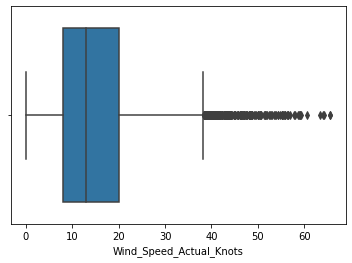

In [ ]:
sns.boxplot(x=hourly.iloc[:,1])

<AxesSubplot:xlabel='Wind_Speed_Actual_Knots'>

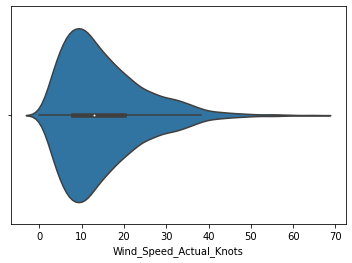

In [ ]:
sns.violinplot(x=hourly.iloc[:,1])

In [ ]:
daily.describe()

,Hydrogen_Demand_Actual_KG,Hydrogen_Demand_Forecast_KG
count,365.000000,365.000000
mean,16976.254795,17493.265753
std,5696.495785,4815.436566
min,0.000000,0.000000
25%,16988.000000,17137.000000
50%,18376.000000,18397.000000
75%,19789.000000,19797.000000
max,25472.000000,25506.000000


In [ ]:
daily.isnull().sum()

Date                           0
Hydrogen_Demand_Actual_KG      0
Hydrogen_Demand_Forecast_KG    0
dtype: int64

<AxesSubplot:xlabel='Hydrogen_Demand_Actual_KG', ylabel='Hydrogen_Demand_Forecast_KG'>

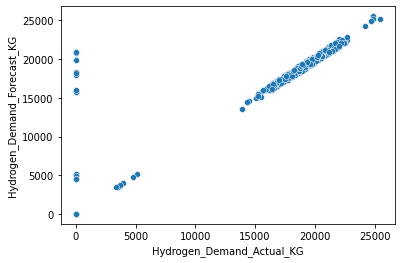

In [ ]:
sns.scatterplot(data=daily, x=daily.iloc[:,1], y=daily.iloc[:,2])

In [ ]:
# count the number of rows where actual hydrogen demand was supposedly zero
daily[daily.iloc[:,1]==0].count()
# daily[daily.iloc[:,2]==0].count()

Date                           28
Hydrogen_Demand_Actual_KG      28
Hydrogen_Demand_Forecast_KG    28
dtype: int64

In [ ]:
# investigate the zero values
daily[daily.iloc[:,1] == 0]

,Date,Hydrogen_Demand_Actual_KG,Hydrogen_Demand_Forecast_KG
37,07/02/2022,0,0
38,08/02/2022,0,0
39,09/02/2022,0,0
40,10/02/2022,0,0
41,11/02/2022,0,0
42,12/02/2022,0,0
43,13/02/2022,0,0
50,20/02/2022,0,15908
51,21/02/2022,0,17950
52,22/02/2022,0,18303


In [ ]:
daily[daily.iloc[:,2] == 0]

,Date,Hydrogen_Demand_Actual_KG,Hydrogen_Demand_Forecast_KG
37,07/02/2022,0,0
38,08/02/2022,0,0
39,09/02/2022,0,0
40,10/02/2022,0,0
41,11/02/2022,0,0
42,12/02/2022,0,0
43,13/02/2022,0,0
121,02/05/2022,0,0
122,03/05/2022,0,0
123,04/05/2022,0,0


In [ ]:
# we will replace the zero values with averages
average_actual = daily['Hydrogen_Demand_Actual_KG'][daily['Hydrogen_Demand_Actual_KG'] != 0].mean()
average_forecast = daily['Hydrogen_Demand_Forecast_KG'][daily['Hydrogen_Demand_Forecast_KG'] != 0].mean()

daily['Hydrogen_Demand_Actual_KG'] = daily['Hydrogen_Demand_Actual_KG'].replace(0, average_actual)
daily['Hydrogen_Demand_Forecast_KG'] = daily['Hydrogen_Demand_Forecast_KG'].replace(0, average_forecast)

# daily = daily[daily['Hydrogen_Demand_Actual_KG'] != 0]
# daily = daily[daily['Hydrogen_Demand_Forecast_KG'] != 0]

# daily[daily.iloc[:,1]==0].count()

daily.head()

,Date,Hydrogen_Demand_Actual_KG,Hydrogen_Demand_Forecast_KG
0,01/01/2022,17516.0,17925.0
1,02/01/2022,17578.0,17430.0
2,03/01/2022,16044.0,16407.0
3,04/01/2022,17471.0,17890.0
4,05/01/2022,17835.0,18080.0


<AxesSubplot:xlabel='Hydrogen_Demand_Actual_KG', ylabel='Hydrogen_Demand_Forecast_KG'>

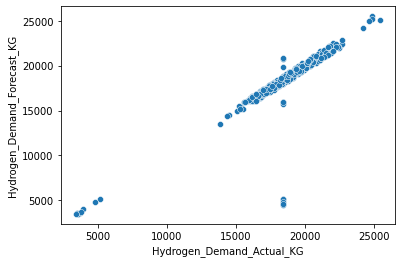

In [ ]:
sns.scatterplot(data=daily, x=daily.iloc[:,1], y=daily.iloc[:,2])

<AxesSubplot:xlabel='Hydrogen_Demand_Actual_KG', ylabel='Hydrogen_Demand_Forecast_KG'>

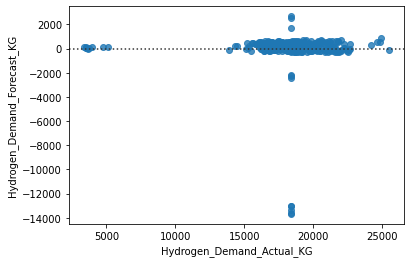

In [ ]:
sns.residplot(data=daily, x=daily.iloc[:,1], y=daily.iloc[:,2])

In [ ]:
# linear regression between actual and forecast hydrogen demand

res = stats.linregress(x=daily.iloc[:,1], y=daily.iloc[:,2])
print(res)

LinregressResult(slope=0.9921129175989359, intercept=-50.724186737708806, rvalue=0.8710175170791973, pvalue=4.2144560034866775e-114, stderr=0.02936873197230469, intercept_stderr=546.6756597844135)


In [ ]:
weekly.isnull().sum()

Week Commencing                0
Hydrogen_Demand_Forecast_KG    0
dtype: int64

In [ ]:
weekly.describe()

,Hydrogen_Demand_Forecast_KG
count,52.000000
mean,122109.384615
std,32899.008837
min,0.000000
25%,122483.250000
50%,127587.500000
75%,136691.250000
max,147822.000000


In [ ]:
weekly.count()

Week Commencing                52
Hydrogen_Demand_Forecast_KG    52
dtype: int64

In [ ]:
# investigate the zero values
weekly[weekly.iloc[:,1] == 0]

,Week Commencing,Hydrogen_Demand_Forecast_KG
5,07/02/2022,0
17,02/05/2022,0


<AxesSubplot:xlabel='Hydrogen_Demand_Forecast_KG', ylabel='Count'>

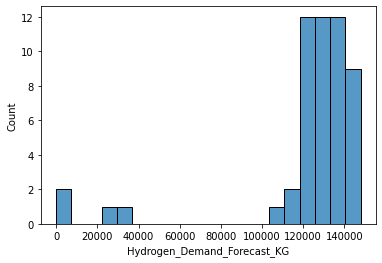

In [ ]:
sns.histplot(data = weekly, x = weekly.iloc[:,1])

In [ ]:
weekly[(weekly.iloc[:,1] > 20000) & (weekly.iloc[:,1] < 40000)]

,Week Commencing,Hydrogen_Demand_Forecast_KG
11,21/03/2022,25339
37,19/09/2022,34192


In [ ]:
monthly.count()

Month                                12
Hydrogen_Daily_Demand_Forecast_KG    12
dtype: int64

In [ ]:
monthly.isnull().sum()

Month                                0
Hydrogen_Daily_Demand_Forecast_KG    0
dtype: int64

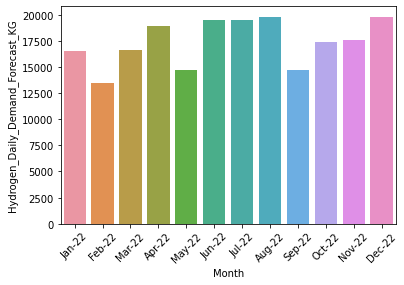

In [ ]:
sns.barplot(data=monthly, x=monthly.iloc[:,0], y=monthly.iloc[:,1])
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

## Feature engineering

We begin by calculating the kg of hydrogen produced from the amount of electricity. For simplicity, we will use the "Production_Actual_MWh" column:

In [ ]:
hourly["Hydrogen_gen_kg"] = hourly["Production_Actual_MWh"] * 1000 / 40 * 0.74

# sns.violinplot(data=hourly, x=hourly.iloc[0][:24], y=hourly["Hydrogen_gen_kg"][:24])
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=45)
# plt.show()

# hourly.iloc[:,0][0][-5:]

hourly.head()

,DateHour,Wind_Speed_Actual_Knots,Production_Actual_MWh,Production_Forecast_1hour_MWh,Production_Forecast_6hour_MWh,Production_24hour_MWh,Electricity_Prices_Day_Ahead_Dollar,Electricity_Prices_Spot_Dollar,Hydrogen_gen_kg
0,01/01/2022 00:00,10.34,35.3697,30.2627,19.3683,11.2438,133.00,131.98,654.33945
1,01/01/2022 01:00,9.52,27.5898,24.9854,19.2894,6.7481,138.45,138.43,510.41130
2,01/01/2022 02:00,6.31,8.0303,13.5787,18.6246,10.6262,107.54,105.02,148.56055
3,01/01/2022 03:00,7.38,12.8577,13.8099,17.0159,10.6262,105.54,104.18,237.86745
4,01/01/2022 04:00,7.03,11.1329,10.5426,13.9052,12.3877,107.69,108.36,205.95865


We now plot the distribution of electricity prices across each of the twenty-four hours of the day:

In [ ]:
#hourly["Hour"] = hourly["DateHour"].apply(lambda x: x[-5:])
hourly["DateHour"] = pd.to_datetime(hourly["DateHour"])
hourly.head()

,DateHour,Wind_Speed_Actual_Knots,Production_Actual_MWh,Production_Forecast_1hour_MWh,Production_Forecast_6hour_MWh,Production_24hour_MWh,Electricity_Prices_Day_Ahead_Dollar,Electricity_Prices_Spot_Dollar,Hydrogen_gen_kg
0,2022-01-01 00:00:00,10.34,35.3697,30.2627,19.3683,11.2438,133.00,131.98,654.33945
1,2022-01-01 01:00:00,9.52,27.5898,24.9854,19.2894,6.7481,138.45,138.43,510.41130
2,2022-01-01 02:00:00,6.31,8.0303,13.5787,18.6246,10.6262,107.54,105.02,148.56055
3,2022-01-01 03:00:00,7.38,12.8577,13.8099,17.0159,10.6262,105.54,104.18,237.86745
4,2022-01-01 04:00:00,7.03,11.1329,10.5426,13.9052,12.3877,107.69,108.36,205.95865


In [ ]:
hourly["Month"] = hourly["DateHour"].dt.month
# hourly["Month"].head(40)

0    0
1    1
2    2
3    3
4    4
Name: Hour, dtype: int64


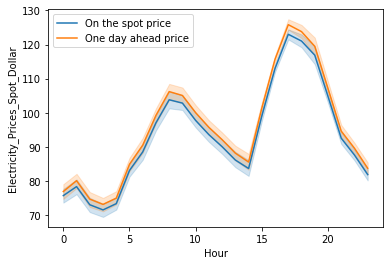

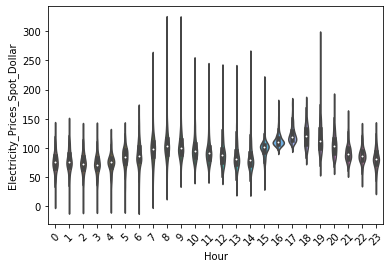

In [ ]:
# Data analysis with the hour of day
hourly["Hour"] = hourly["DateHour"].dt.hour
print(hourly["Hour"].head())

sns.lineplot(data=hourly, x=hourly["Hour"], y=hourly["Electricity_Prices_Spot_Dollar"], label="On the spot price")
sns.lineplot(data=hourly, x=hourly["Hour"], y=hourly["Electricity_Prices_Day_Ahead_Dollar"], label="One day ahead price")
locs, labels = plt.xticks()
#plt.setp(labels, rotation=45)
plt.legend()
plt.show()

sns.violinplot(data=hourly, x=hourly["Hour"], y=hourly["Electricity_Prices_Spot_Dollar"])
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

The one-day-ahead prices appear to be higher than the on-the-day prices. Hence, it makes sense for us to buy electricity on the spot when needed. Moreover, if we ever need to buy electricity, we can pick two equidistent points in time (from the above graph we could pick, say, 3am and 3pm) and determine in the present moment whether we need to purchase electricity or not.

We now observe the correlation between wind speed and actual electricity produced:



In [ ]:
# hourly["DateHour"][hourly["Production_Actual_MWh"] == hourly["Production_Actual_MWh"].max()]
# hourly[hourly["Production_Actual_MWh"] > 1000].iloc[:,0]

<AxesSubplot:xlabel='Wind_Speed_Actual_Knots', ylabel='Production_Actual_MWh'>

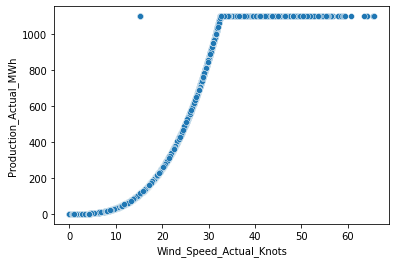

In [ ]:
sns.scatterplot(data=hourly, x=hourly.iloc[:,1], y=hourly.iloc[:,2])

It appears as though the electricity generated is maximised past roughly 30 knots.



We decided to take the maximum value between the predicted and actual demand values, to ensure that we satisfy the worst-case scenario for hydrogen demand. We will later factor in the maximum hydrogen capacity of 86 tonnes.

In [ ]:
daily['max_demand'] = daily.max(axis=1)

daily.head()

<ipython-input-38-5af48c174d6a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  daily['max_demand'] = daily.max(axis=1)


,Date,Hydrogen_Demand_Actual_KG,Hydrogen_Demand_Forecast_KG,max_demand
0,01/01/2022,17516.0,17925.0,17925.0
1,02/01/2022,17578.0,17430.0,17578.0
2,03/01/2022,16044.0,16407.0,16407.0
3,04/01/2022,17471.0,17890.0,17890.0
4,05/01/2022,17835.0,18080.0,18080.0


# Strategy 1

- Naive approach: always fill the hydrogen tank to the maximum capacity of 86 tonnes, selling through the rest of the day or until the hydrogen demand resurfaces, whichever comes first. This is the simplest method to implement, but will not necessarily yield the greatest profit.

- Our first strategy: always ensure that 10 tonnes of hydrogen are present in the tank. Whenever we fall below 10 tonnes, we buy up the remainder; if we're above, we sell. For simplicity, we will restrict our buying and selling to be done at the end of the day. Hence, we begin by aggregating hydrogen produced on a daily basis using the hourly dataset.

We will start by taking the "Hydrogen_gen_kg" that we made in the hourly dataset and will compare the daily aggregation of these values to those in the daily dataset. This will tell us the excess amount of hydrogen we have at the end of each day, allowing us to infer a buying/selling strategy.

In [ ]:
# hydrogen_per_day = hourly["Hydrogen_gen_kg"].groupby(hourly["DateHour"]).sum()
# hydrogen_per_day

hourly_new_index = hourly.copy()

# Set the index to a datetime column
hourly_new_index.index = pd.date_range(start='2022-01-01', periods=len(hourly_new_index), freq='H')

# Group by every 24 hours using pd.Grouper
grouped = hourly_new_index.groupby(pd.Grouper(freq='24H'))

# Sum up the values in each group
summed = grouped.sum()

summed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 to 2022-12-31
Freq: 24H
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Wind_Speed_Actual_Knots              365 non-null    float64
 1   Production_Actual_MWh                365 non-null    float64
 2   Production_Forecast_1hour_MWh        365 non-null    float64
 3   Production_Forecast_6hour_MWh        365 non-null    float64
 4   Production_24hour_MWh                365 non-null    float64
 5   Electricity_Prices_Day_Ahead_Dollar  365 non-null    float64
 6   Electricity_Prices_Spot_Dollar       365 non-null    float64
 7   Hydrogen_gen_kg                      365 non-null    float64
 8   Month                                365 non-null    int64  
 9   Hour                                 365 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 31.4 KB


In [ ]:
result = summed["Hydrogen_gen_kg"]

In [ ]:
summed.reset_index()

,index,Wind_Speed_Actual_Knots,Production_Actual_MWh,Production_Forecast_1hour_MWh,Production_Forecast_6hour_MWh,Production_24hour_MWh,Electricity_Prices_Day_Ahead_Dollar,Electricity_Prices_Spot_Dollar,Hydrogen_gen_kg,Month,Hour
0,2022-01-01,228.39,772.5928,676.7660,620.3291,587.7066,2868.09,2828.72,14292.96680,24,276
1,2022-01-02,289.36,1491.9359,1308.7678,1284.6949,1274.1076,3087.07,3076.74,27600.81415,48,276
2,2022-01-03,383.17,3319.0171,3031.8792,2912.0951,2595.6325,3679.55,3476.88,61401.81635,72,276
3,2022-01-04,488.99,7108.5844,6457.4834,6087.9945,5082.8403,3609.07,3422.26,131508.81140,96,276
4,2022-01-05,491.76,6917.3756,6517.9080,6606.3100,6824.8879,3122.82,3032.76,127971.44860,120,276
...,...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,451.75,7303.9776,6144.8294,5567.0817,3815.0982,1858.99,1910.55,135123.58560,288,276
361,2022-12-28,675.58,16312.8398,16185.0233,16061.8759,15580.2503,1775.58,1704.32,301787.53630,288,276
362,2022-12-29,606.30,15267.9809,13741.6390,12857.6685,11251.3546,1812.42,1776.51,282457.64665,288,276
363,2022-12-30,845.79,25610.5624,25977.2225,25958.6972,26066.1413,1902.44,1801.96,473795.40440,288,276


In [ ]:
result.reset_index(drop=True)
# daily["Hydrogen_generated_kg"] = result
# daily = pd.concat([daily, result], axis=1)

daily = daily.assign(Hydrogen_generated_kg=result.values)

In [ ]:
daily

,Date,Hydrogen_Demand_Actual_KG,Hydrogen_Demand_Forecast_KG,max_demand,Hydrogen_generated_kg
0,01/01/2022,17516.0,17925.0,17925.0,14292.96680
1,02/01/2022,17578.0,17430.0,17578.0,27600.81415
2,03/01/2022,16044.0,16407.0,16407.0,61401.81635
3,04/01/2022,17471.0,17890.0,17890.0,131508.81140
4,05/01/2022,17835.0,18080.0,18080.0,127971.44860
...,...,...,...,...,...
360,27/12/2022,24899.0,25506.0,25506.0,135123.58560
361,28/12/2022,25472.0,25103.0,25472.0,301787.53630
362,29/12/2022,24878.0,25203.0,25203.0,282457.64665
363,30/12/2022,22706.0,22848.0,22848.0,473795.40440


In [ ]:
daily["Leftover_hydrogen"] = daily["Hydrogen_generated_kg"] - daily["max_demand"]

daily

,Date,Hydrogen_Demand_Actual_KG,Hydrogen_Demand_Forecast_KG,max_demand,Hydrogen_generated_kg,Leftover_hydrogen
0,01/01/2022,17516.0,17925.0,17925.0,14292.96680,-3632.03320
1,02/01/2022,17578.0,17430.0,17578.0,27600.81415,10022.81415
2,03/01/2022,16044.0,16407.0,16407.0,61401.81635,44994.81635
3,04/01/2022,17471.0,17890.0,17890.0,131508.81140,113618.81140
4,05/01/2022,17835.0,18080.0,18080.0,127971.44860,109891.44860
...,...,...,...,...,...,...
360,27/12/2022,24899.0,25506.0,25506.0,135123.58560,109617.58560
361,28/12/2022,25472.0,25103.0,25472.0,301787.53630,276315.53630
362,29/12/2022,24878.0,25203.0,25203.0,282457.64665,257254.64665
363,30/12/2022,22706.0,22848.0,22848.0,473795.40440,450947.40440


For our first strategy, we take the leftover hydrogen value and convert that entirely to dollars. If our leftover hydrogen value falls below 10 tonnes, then we buy up the remaining amount of electricity to constitute 10 tonnes in the tank again.

In [ ]:
# mean Electricity_Prices_Spot_Dollar
mean_elec_conv = hourly["Electricity_Prices_Spot_Dollar"].mean()
print(f'The average electricity price conversion rate per kWh of electricity is {mean_elec_conv:.2f}.')

The average electricity price conversion rate per kWh of electricity is 93.29.


In [ ]:
def leftover_to_profit(x):
  '''
  Param:
  Returns:
  '''
  # convert hydrogen in kg to electricity in kWh rather than MWh
  # since our dollar conversion rates are given per kWh
  # divide by 0.74 to account for the loss in energy that's about to happen
  electricity = x * 40 / 0.74
  # calculate the profit acrrued for this value of electricity
  price_conversion = mean_elec_conv
  profit = mean_elec_conv * electricity
  if x > 0:
    return profit
  else:
    return 1.1 * profit

In [ ]:
daily["Profit"] = daily["Leftover_hydrogen"].apply(leftover_to_profit)

daily

,Date,Hydrogen_Demand_Actual_KG,Hydrogen_Demand_Forecast_KG,max_demand,Hydrogen_generated_kg,Leftover_hydrogen,Profit
0,01/01/2022,17516.0,17925.0,17925.0,14292.96680,-3632.03320,-2.014751e+07
1,02/01/2022,17578.0,17430.0,17578.0,27600.81415,10022.81415,5.054388e+07
2,03/01/2022,16044.0,16407.0,16407.0,61401.81635,44994.81635,2.269036e+08
3,04/01/2022,17471.0,17890.0,17890.0,131508.81140,113618.81140,5.729664e+08
4,05/01/2022,17835.0,18080.0,18080.0,127971.44860,109891.44860,5.541698e+08
...,...,...,...,...,...,...,...
360,27/12/2022,24899.0,25506.0,25506.0,135123.58560,109617.58560,5.527887e+08
361,28/12/2022,25472.0,25103.0,25472.0,301787.53630,276315.53630,1.393427e+09
362,29/12/2022,24878.0,25203.0,25203.0,282457.64665,257254.64665,1.297305e+09
363,30/12/2022,22706.0,22848.0,22848.0,473795.40440,450947.40440,2.274075e+09


In [ ]:
strategy_1_profit = daily["Profit"].sum()
print(f'The profit accrued from strategy 1 is ${strategy_1_profit:,.2f}.')

The profit accrued from strategy 1 is $145,036,137,738.77.


However, this model is not accurate; it assumes that we are generating hydrogen at every hour of every day. However, this hydrogen generation cannot be done when we're selling electricity to the grid (corresponding to -1 on the solutions template) or when we're converting from hydrogen to electricity or vice versa (corresponding to 0 on the solutions template).

# Strategy 2

We now seek to remedy the issue of the "hydrogen debt" in our tank. Below, we implement the following procedure:
* Consider the demand for the day. From our analysis before, we found that the forecast values for electricity demand were almost equal to the actual demand values on the day, hence we take the maximum of the two values for the day to ensure we satisfy demand.
* Starting from midnight, we produce hydrogen. Once our accumulation of hydrogen on that day has exceeded the demand necessary, we then turn the electrolyser off for the rest of the day, selling any electricity produced from then on straight to the grid without electrolyser intervention.
* If we are unable to satisfy demand by the end of the day, then we buy the deficit from the grid at the end of the day/at the start of the day.

To extend the above, we could tailor our selling times depending on when we will make the most profit. But for now, we will stick to this sequential approach.

## Calculating the profit (training set)

In [ ]:
print(len(hourly))

8760


In [ ]:
hourly_1 = hourly.iloc[:24,:]

hourly_1

,DateHour,Wind_Speed_Actual_Knots,Production_Actual_MWh,Production_Forecast_1hour_MWh,Production_Forecast_6hour_MWh,Production_24hour_MWh,Electricity_Prices_Day_Ahead_Dollar,Electricity_Prices_Spot_Dollar,Hydrogen_gen_kg,Month,Hour
0,2022-01-01 00:00:00,10.34,35.3697,30.2627,19.3683,11.2438,133.00,131.98,654.33945,1,0
1,2022-01-01 01:00:00,9.52,27.5898,24.9854,19.2894,6.7481,138.45,138.43,510.41130,1,1
2,2022-01-01 02:00:00,6.31,8.0303,13.5787,18.6246,10.6262,107.54,105.02,148.56055,1,2
3,2022-01-01 03:00:00,7.38,12.8577,13.8099,17.0159,10.6262,105.54,104.18,237.86745,1,3
4,2022-01-01 04:00:00,7.03,11.1329,10.5426,13.9052,12.3877,107.69,108.36,205.95865,1,4
5,2022-01-01 05:00:00,5.74,6.0457,7.7282,8.6532,14.9853,98.36,96.81,111.84545,1,5
6,2022-01-01 06:00:00,4.64,3.1974,4.5571,5.1233,19.0160,108.73,107.59,59.15190,1,6
7,2022-01-01 07:00:00,7.25,12.1890,6.4915,8.4198,36.8433,74.94,73.33,225.49650,1,7
8,2022-01-01 08:00:00,9.51,27.5379,11.6169,10.2155,43.2345,75.86,75.03,509.45115,1,8
9,2022-01-01 09:00:00,7.33,12.6148,14.5050,10.4862,13.6434,105.67,104.07,233.37380,1,9


In [ ]:
daily_1 = daily.iloc[0,:]

daily_1

Date                                01/01/2022
Hydrogen_Demand_Actual_KG              17516.0
Hydrogen_Demand_Forecast_KG            17925.0
max_demand                             17925.0
Hydrogen_generated_kg               14292.9668
Leftover_hydrogen                   -3632.0332
Profit                        -20147512.571587
Name: 0, dtype: object

Below, we test profit implementation on the 1st January and the 2nd January separately, before extending the implementation to the entire dataset:

In [ ]:
count = 0
profit = 0
defecit_in_kg = 0
for i in range(len(hourly_1["Hydrogen_gen_kg"])):
  count += hourly_1["Hydrogen_gen_kg"][i]
  # print("Current hydrogen generation is at", count)
  if count > daily_1["max_demand"]:
    #for j in range(i+1, len(hourly_1["Hydrogen_gen_kg"])):
      profit += hourly_1["Production_Actual_MWh"][i] * 1000 * hourly_1["Electricity_Prices_Spot_Dollar"][i]

if count < daily_1["max_demand"]:
  defecit_in_kg = daily_1["max_demand"] - count
  defecit_in_kWH = defecit_in_kg * 40 / 0.74
  profit -= 1.1 * defecit_in_kWH * hourly_1["Electricity_Prices_Spot_Dollar"][23]

print(f'The profit accrued from day 1 using Strategy 2 is ${profit:,.2f}.')

The profit accrued from day 1 using Strategy 2 is $-21,816,150.99.


In [ ]:
hourly_2 = hourly.iloc[24:48,:]
hourly_2

,DateHour,Wind_Speed_Actual_Knots,Production_Actual_MWh,Production_Forecast_1hour_MWh,Production_Forecast_6hour_MWh,Production_24hour_MWh,Electricity_Prices_Day_Ahead_Dollar,Electricity_Prices_Spot_Dollar,Hydrogen_gen_kg,Month,Hour
24,2022-02-01 00:00:00,14.14,90.3789,62.8547,60.8104,44.8071,102.43,102.96,1672.00965,2,0
25,2022-02-01 01:00:00,13.09,71.8013,63.1395,60.5283,49.0378,106.40,105.09,1328.32405,2,1
26,2022-02-01 02:00:00,14.41,95.6889,85.5315,70.5292,61.6892,103.84,104.33,1770.24465,2,2
27,2022-02-01 03:00:00,13.15,72.7909,76.1498,70.9089,71.3362,102.09,102.21,1346.63165,2,3
28,2022-02-01 04:00:00,13.62,80.7971,81.7633,81.3632,72.2950,100.99,99.63,1494.74635,2,4
29,2022-02-01 05:00:00,13.50,78.6740,77.3706,79.1653,73.0907,95.14,95.30,1455.46900,2,5
30,2022-02-01 06:00:00,12.71,65.6559,70.1459,71.7970,68.9222,111.71,111.54,1214.63415,2,6
31,2022-02-01 07:00:00,11.92,54.1364,59.7070,61.7014,62.7787,107.93,107.37,1001.52340,2,7
32,2022-02-01 08:00:00,12.98,69.9020,62.9895,69.3715,71.0918,118.13,118.19,1293.18700,2,8
33,2022-02-01 09:00:00,15.99,130.8377,80.9759,77.2880,75.6944,137.42,136.26,2420.49745,2,9


In [ ]:
daily_2 = daily.iloc[1,:]

daily_2

Date                                02/01/2022
Hydrogen_Demand_Actual_KG              17578.0
Hydrogen_Demand_Forecast_KG            17430.0
max_demand                             17578.0
Hydrogen_generated_kg              27600.81415
Leftover_hydrogen                  10022.81415
Profit                         50543884.718446
Name: 1, dtype: object

In [ ]:
# day 2 profit
hourly_2 = hourly.iloc[24:48,:]
# reset the index of hourly_2 for the loop
hourly_2 = hourly_2.reset_index(drop=True)
count = 0
profit = 0
defecit_in_kg = 0
for i in range(len(hourly_2["Hydrogen_gen_kg"]) - 1):
  count += hourly_2["Hydrogen_gen_kg"][i]
  # print("Current hydrogen generation is at", count)
  if count > daily_2["max_demand"]:
    #for j in range(i+1, len(hourly_1["Hydrogen_gen_kg"])):
    profit += hourly_2["Production_Actual_MWh"][i+1] * 1000 * hourly_2["Electricity_Prices_Spot_Dollar"][i+1]

if count < daily_2["max_demand"]:
  defecit_in_kg = daily_2["max_demand"] - count
  defecit_in_kWH = defecit_in_kg * 40 / 0.74
  profit -= 1.1 * defecit_in_kWH * hourly_2["Electricity_Prices_Spot_Dollar"][23]
  print(f'The profit accrued from day {k} using Strategy 2 is ${current_daily_profit:,.2f}.')


print(f'The profit accrued from day 2 using Strategy 2 is ${profit:,.2f}.')

The profit accrued from day 2 using Strategy 2 is $65,701,928.38.


This _negative_ value makes sense: what it's telling us is that, with strategy 2, we're in an electricity deficit by the end of the first day, so we must buy electricity from the grid, resulting in a profit loss. This won't be the case for every day, as indicated by the below generalisation to the entire 365-day dataset:

In [ ]:
def Profit(hourly, daily):
  # num_of_iterations = 0
  count = 0
  profit = 0
  stopping_hour_list = []
  stopping_hour_current = []
  for k in range(daily.shape[0]):
    stopping_hour_current.clear()
    daily_profit = 0
    hourly_subset = hourly.iloc[k*24: (k+1)*24,:]
    # reset the index for the kth slice
    hourly_subset = hourly_subset.reset_index(drop=True)
    daily_subset = daily.iloc[k,:]
    count = 0
    defecit_in_kg = 0
    for i in range(23):
      count += hourly_subset["Hydrogen_gen_kg"][i]
      if count >= daily_subset["max_demand"]:
        stopping_hour_current.append(i+1)
        daily_profit += hourly_subset["Production_Actual_MWh"][i+1] * 1000 * hourly_subset["Electricity_Prices_Spot_Dollar"][i+1]
        profit += hourly_subset["Production_Actual_MWh"][i+1] * 1000 * hourly_subset["Electricity_Prices_Spot_Dollar"][i+1]

    if count < daily_subset["max_demand"]:
      defecit_in_kg = daily_subset["max_demand"] - count
      defecit_in_kWH = defecit_in_kg * 40 / 0.74
      daily_profit -= 1.1 * defecit_in_kWH * hourly_subset["Electricity_Prices_Spot_Dollar"][23]
      profit -= 1.1 * defecit_in_kWH * hourly_subset["Electricity_Prices_Spot_Dollar"][23]
    # num_of_iterations += 1
    if not stopping_hour_current:
      stopping_hour_list.append(None)
    else:
      stopping_hour_list.append(min(stopping_hour_current))
    # print(f'The profit accrued in day {k+1} is ${daily_profit:,.2f}.')
  
  # print(f'The maximum profit accrued in a day was on day {k+1}, with a value of ${max_daily_profit:,.2f}.')
  return profit, stopping_hour_list

In [ ]:
profit, stopping_hour_list = Profit(hourly, daily)
print(f'The profit accrued through the year using Strategy 2 is ${profit:,.2f}.')
print(f'The following list indicates the hour in which we stop generating hydrogen in each day. If we do not satisfy demand on any particular day, the value in the list is None:\n{stopping_hour_list}.')

The profit accrued through the year using Strategy 2 is $144,818,275,000.04.
The following list indicates the hour in which we stop generating hydrogen in each day. If we do not satisfy demand on any particular day, the value in the list is None:
[None, 12, 7, 6, 4, 6, 22, 22, 10, None, 6, 2, 10, 2, None, 10, 5, 13, 1, 1, 1, 15, 19, 9, 11, 9, 13, 3, 2, 15, None, None, 4, 1, 13, 13, None, 6, 2, None, None, 13, 8, 7, 5, 1, 2, 2, 3, 2, 5, 3, None, 9, 1, 4, None, None, None, None, None, None, None, 11, None, None, None, 17, 4, 2, 3, 2, 4, 3, 15, None, 17, 5, None, 2, 13, 9, 3, 8, 1, 1, 2, 2, None, None, 9, 5, 14, 18, 7, 5, 14, 13, 16, 17, 22, 15, None, None, None, None, None, None, None, None, None, None, None, None, 20, None, None, 19, 15, None, None, 23, 9, 1, 5, None, 4, 8, 3, 6, 18, 1, 13, None, 15, 3, 6, 12, 8, 13, 2, 1, 6, 3, 4, 11, None, None, None, None, None, None, None, 12, 17, 16, None, None, None, 19, 20, 12, 17, None, 20, 7, None, None, 5, None, None, 6, 6, 23, 18, 14, None, 9

## Pre-processing the test data

We must now prepare the test data:

In [ ]:
hourly_test = pd.read_csv("hourly_test.csv")
daily_test = pd.read_csv("daily_test.csv")

In [ ]:
hourly_test.describe()

,Wind_Speed_Actual_Knots,Production_Actual_MWh,Production_Forecast_1hour_MWh,Production_Forecast_6hour_MWh,Production_24hour_MWh,Electricity_Prices_Day_Ahead_Dollar,Electricity_Prices_Spot_Dollar
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,19.421949,382.254369,363.040016,352.922638,334.333556,78.090658,77.769837
std,11.050133,396.114479,382.200867,372.639631,352.118420,21.425705,21.333187
min,-0.130000,-0.000100,0.266100,0.426800,0.327100,3.763248,3.616601
25%,9.330000,25.960475,24.896375,23.749175,25.406500,64.252866,64.076123
50%,19.130000,224.003800,219.944100,200.449400,211.496850,76.746812,77.098149
75%,27.875000,692.757700,630.194725,590.765475,577.529575,90.654454,90.181023
max,50.860000,1100.000000,1100.000000,1100.000000,1100.000000,134.189296,133.526788


In [ ]:
hourly_test.isnull().sum()

DateHour                               0
Wind_Speed_Actual_Knots                0
Production_Actual_MWh                  0
Production_Forecast_1hour_MWh          0
Production_Forecast_6hour_MWh          0
Production_24hour_MWh                  0
Electricity_Prices_Day_Ahead_Dollar    0
Electricity_Prices_Spot_Dollar         0
dtype: int64

In [ ]:
daily_test[daily_test.iloc[:,1] == 0]

,Date,Hydrogen_Demand_Actual_KG,Hydrogen_Demand_Forecast_KG
15,16/01/2023,0,0
16,17/01/2023,0,0
17,18/01/2023,0,0
18,19/01/2023,0,0
19,20/01/2023,0,0
20,21/01/2023,0,0
21,22/01/2023,0,0


We have a string of seven consecutive days of 0 demand (both forecast and actual). For simplicity, we will simply impute these with the mean:

In [ ]:
average_actual = daily_test['Hydrogen_Demand_Actual_KG'][daily_test['Hydrogen_Demand_Actual_KG'] != 0].mean()
average_forecast = daily_test['Hydrogen_Demand_Forecast_KG'][daily_test['Hydrogen_Demand_Forecast_KG'] != 0].mean()

daily_test['Hydrogen_Demand_Actual_KG'] = daily_test['Hydrogen_Demand_Actual_KG'].replace(0, average_actual)
daily_test['Hydrogen_Demand_Forecast_KG'] = daily_test['Hydrogen_Demand_Forecast_KG'].replace(0, average_forecast)

Now that we've dealt with null and zero values, we can append the features we created in the "Feature engineering" section:

In [ ]:
hourly_test["Hydrogen_gen_kg"] = hourly_test["Production_Actual_MWh"] * 1000 / 40 * 0.74

In [ ]:
hourly_test.describe()

## Profit of test data

In [ ]:
daily_test["max_demand"] = daily_test[["Hydrogen_Demand_Actual_KG", "Hydrogen_Demand_Forecast_KG"]].max(axis=1)

daily_test

,Date,Hydrogen_Demand_Actual_KG,Hydrogen_Demand_Forecast_KG,max_demand
0,01/01/2023,19874.000000,19500.000000,19874.000000
1,02/01/2023,18483.000000,18547.000000,18547.000000
2,03/01/2023,19284.000000,19705.000000,19705.000000
3,04/01/2023,19567.000000,19129.000000,19567.000000
4,05/01/2023,20457.000000,20614.000000,20614.000000
5,06/01/2023,20236.000000,20216.000000,20236.000000
6,07/01/2023,18626.000000,18215.000000,18626.000000
7,08/01/2023,16707.000000,17101.000000,17101.000000
8,09/01/2023,16924.000000,17107.000000,17107.000000
9,10/01/2023,16919.000000,17288.000000,17288.000000


In [ ]:
profit_test, stopping_list_test = Profit(hourly_test, daily_test)

print(f'The profit accrued through the month of test data using Strategy 2 is ${profit_test:,.2f}.')
print(f'The following list indicates the hour in which we stop generating hydrogen in each day. If we do not satisfy demand on any particular day, the value in the list is None:\n{stopping_list_test}.')

The profit accrued through the month of test data using Strategy 2 is $18,916,885,222.74.
The following list indicates the hour in which we stop generating hydrogen in each day. If we do not satisfy demand on any particular day, the value in the list is None:
[3, 13, 1, 11, 21, 5, 7, 1, 1, 3, 2, 1, 2, 1, 1, 2, 4, 8, None, None, None, None, None, None, None, 10, 2, 3, 2, 3, 3].


# Appendix

The below section contains some code snippets that were removed from the final presentation.

## Which forecasting value is the most accurate?

<AxesSubplot:>

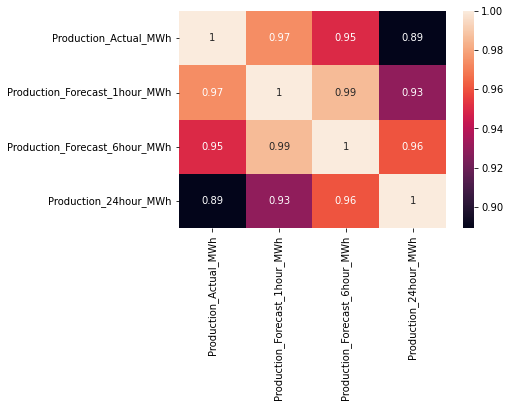

In [ ]:
production_values = hourly[["Production_Actual_MWh", "Production_Forecast_1hour_MWh", "Production_Forecast_6hour_MWh", "Production_24hour_MWh"]]

correlation = production_values.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

From the above, it is clear that the forecast an hour before is the most related to the actual electricity production value. However, it is important for us to investigate how accuracte the 6-hour and 24-hour forecasts are as well; if we choose to only buy electricity at two times in the day (e.g. 2am and 2pm), then we must ensure relative accuracy in such forecasts.

## Prototype profit function

In [ ]:
def TheFunction(x, y): #x is the daily data, y is the hourly
  reserve_amount = 86_000
  current_amount = 10_000
  days = x.shape(0) #Number of days in data given
  for i in range(days):
    daily_left = x.iloc[i]['Leftover_Hydrogen']
    if (daily_left >= 0) and (current_amount + daily_left <= reserve_amount):
      current_amount += daily_left
    elif (daily_left >= 0) and (current_amount + daily_left > reserve_amount):
      current_amount += daily_left
      sell = current_amount - 86_000
      current_amount = 86_000
    else:
      current_amount += daily_left
      buy = daily_left
      


If we want to sell our leftover, we convert the leftover with the formula 40/(1000*0.74) and it will be as if we never converted that portion to hydrogen in the first place